# 01 - Generating data

In this step we generate data appropriate for linear regression.

We are going to generate data using the this equation:
$$\hat{\mathbf{y}}=\mathbf{X}\mathbf{c}+\mathbf{\epsilon}$$
- $\mathbf{y}$: vector of dependet variables ($n \times 1$)
- $\mathbf{X}$: matrix of independet variables ($n \times (p+1)$)
- $\mathbf{c}$: vector of coefficients ($(p+1) \times 1$)
- $\mathbf{\epsilon}$: vector of errors ($n \times 1$)

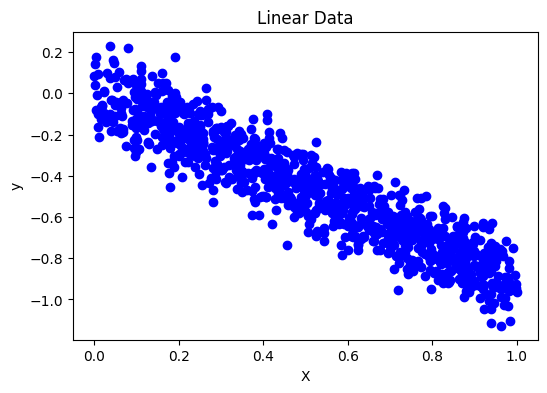

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gen_linear_data(n_sample:int, n_features:int, random_state:int=None):

    if random_state is not None:
        np.random.seed(random_state)

    X = np.random.rand(n_sample, n_features) # independent variable matix
    c = np.random.randn(n_features) # coefficients matrix
    i =  np.random.randn() # intercepts
    # y = X @ c + i
    y = X @ c

    std = np.std(y) 
    e = np.random.normal(scale=std, size=n_sample) # error vector
    e = np.random.normal(scale=0.1, size=n_sample) # error vector
    y = y + e

    X_labels = [f'feature_{i+1}' for i in range(n_features)]
    y_label = ['target']
    c_label = ['coefficients']

    data = np.hstack([X,y.reshape(-1,1)])
    columns = X_labels + y_label

    df_data = pd.DataFrame(data=data, columns = columns)
    df_coeffs = pd.DataFrame(data=c.reshape(-1,1), columns=c_label)

    df_data.to_csv('lr_synthetic_data.csv',index=False)
    df_coeffs.to_csv('lr_synthetic_coeffs.csv',index=False)

def plot_linear_data(data_path:str):

    df = pd.read_csv(data_path)
    x = df['feature_1']
    y = df['target']

    fix, ax = plt.subplots(figsize=(6,4))

    ax.scatter(x,y, color='blue')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title('Linear Data')

    plt.show()

if __name__ == '__main__':
    gen_linear_data(n_sample=1000, n_features=1, random_state=2024)
    plot_linear_data(data_path='lr_synthetic_data.csv')

# 02 - Linear Regression

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display, clear_output

class lr_model():

    def __init__(self, n_sample, n_features, random_state=None):
        self.n_sample = n_sample
        self.n_features = n_features
        self.random_state = random_state
        if self.random_state is not None:
            np.random.seed(self.random_state)
        self.mse_history = []

    def load_csv(self, file_path:str):
        self.df_data = pd.read_csv(file_path)   
        X = self.df_data.iloc[:,:self.n_features]
        y = self.df_data.iloc[:,self.n_features]
        self.X_train, self.X_test, self.y_train, self.y_test \
              = train_test_split(X, y, test_size=0.2, random_state=self.random_state)
        print('Data loaded and splited to train and test sections')      

    def save_csv(self, file_path='data_proc.csv'):
        self.df_data.to_csv(file_path, index=False)
        print(f'Data saved to the CSV file: {file_path}')

    def init_model(self):
        self.X = np.random.rand(self.n_sample, self.n_features)
        self.w = np.random.randn(self.n_features)
        print('Linear regressor model initiallized')

    def predict(self, X):
        y_pred = X @ self.w 
        return y_pred

    def calc_mse(self, X, y): 
        y_true = y
        y_pred = self.predict(X)
        se = (y_true - y_pred)**2
        mse = np.round(np.mean(se),2)
        # print('Calculation of MSE finished completly')
        return mse

    def calc_grad_mse(self,X, y):
        N = X.shape[0]
        grad = np.round((2/N) * (X.T @ (X @ self.w - y)),2)
        # print('Gradient calculation of MSE finished completly')
        return grad

    def evaluate(self):
        self.mse_train = self.calc_mse(self.X_train, self.y_train)
        self.grad_mse_train = self.calc_grad_mse(self.X_train, self.y_train)
        self.mse_history.append(self.mse_train)

        self.mse_test = self.calc_mse(self.X_test, self.y_test)
        self.grad_mse_test = self.calc_grad_mse(self.X_test, self.y_test)
        # print('Evaluation finished completly')

    def plot_loss(self,loss_values, delay=0.1, color='b-', highlight_color='red'):
        
        num_steps = len(loss_values)
        steps = list(range(1, num_steps + 1))  # X-axis (step numbers)
    
        # Plot loss function progression
        plt.plot(steps, loss_values, color, label="Loss Curve")
        
        # Formatting
        plt.xlabel("Step")
        plt.ylabel("Loss Value")
        plt.legend()
        plt.title(f"Loss Function Progression")
        plt.grid()

        plt.show() 

    def fit_transform(self, mse_thr = 1e-3, alpha=0.5):
        print(f"Loss = {self.mse_train}")
        while self.mse_train > mse_thr:
            self.w = self.w - (alpha*self.grad_mse_train)
            self.evaluate()
            print(f"Loss = {self.mse_train}")
        self.plot_loss(self.mse_history)
        print('Linear regressor fitted to the data.')



In [60]:
lr = lr_model(n_sample=1000, n_features=1)

In [61]:
lr.load_csv(file_path="lr_synthetic_data.csv")

Data loaded and splited to train and test sections


In [62]:
lr.init_model()

Linear regressor model initiallized


In [63]:
lr.evaluate()

In [64]:
lr.w

array([0.48611085])

In [65]:
lr.mse_history

[np.float64(0.66)]

Loss = 0.66
Loss = 0.09
Loss = 0.02
Loss = 0.01


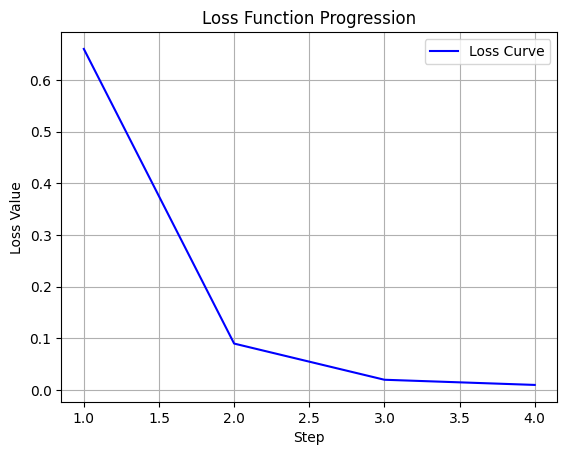

Linear regressor fitted to the data.


In [66]:
lr.fit_transform(mse_thr=1e-2,alpha=1)

In [67]:
lr.w

feature_1   -0.863889
dtype: float64